In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(5,5)

In [ ]:
sns.set_theme(color_codes=True)

In [ ]:
data=pd.read_csv("/content/Sport car price.csv")
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [ ]:
#DATA PREPROCESSING 1

data.select_dtypes(include='object').nunique()

Car Make                    38
Car Model                  176
Engine Size (L)             45
Horsepower                 124
Torque (lb-ft)              93
0-60 MPH Time (seconds)     43
Price (in USD)             367
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [ ]:
data.shape

(1007, 8)

In [ ]:
data.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

In [ ]:
data.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
dtype: object

In [ ]:
data.select_dtypes(exclude='object').nunique()

Year    9
dtype: int64

In [ ]:
data=data.rename(columns={"Price (in USD)":"Price","Engine Size (L)":"Engine Size","Torque (lb-ft)":"Torque","0-60 MPH Time (seconds)":"MPH"})
data.head()

,Car Make,Car Model,Year,Engine Size,Horsepower,Torque,MPH,Price
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [ ]:
#Remove comma from Price Column values
data['Price']=data["Price"].str.replace(",","")

#Convert the price column to integer
data['Price']=data["Price"].astype(int)

#We use .str.replace() to replace anything from string and we can not convert any string to integer without removing the commas

In [ ]:
data["Price"].dtype

dtype('int64')

In [ ]:
data.head()

,Car Make,Car Model,Year,Engine Size,Horsepower,Torque,MPH,Price
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


In [ ]:
#Cleaning of data

In [ ]:
data['MPH'].unique()

array(['4', '2.8', '3', '3.2', '2.7', '3.1', '3.8', '3.5', '2.5', '2.4',
       '5.4', '4.4', '4.8', '4.7', '3.6', '4.1', '1.85', '4.5', '3.3',
       '3.9', '4.2', '3.4', '5.1', '4.3', '2.9', '5', '5.3', '4.9', '6.5',
       '3.7', '1.95', '1.9', '1.98', '2.6', '2.3', '4.6', '< 1.9', '1.8',
       '2.1', '5.2', '2.2', '6.4', '2'], dtype=object)

In [ ]:
data["MPH"]=data["MPH"].replace(to_replace="[^0-9]",value="",regex=True)

In [ ]:
data["MPH"].unique()

array(['4', '28', '3', '32', '27', '31', '38', '35', '25', '24', '54',
       '44', '48', '47', '36', '41', '185', '45', '33', '39', '42', '34',
       '51', '43', '29', '5', '53', '49', '65', '37', '195', '19', '198',
       '26', '23', '46', '18', '21', '52', '22', '64', '2'], dtype=object)

In [ ]:
data["Torque"].unique()

array(['331', '443', '561', '406', '568', '553', '494', '465', '625',
       '481', '516', '1180', '656', '295', '1015', '398', '317', '384',
       '280', '243', '664', '531', '468', '737', '738', '1696', '309',
       '590', '479', '650', '550', '276', '626', '369', '420', '627',
       '455', '505', '560', '457', '707', '270', '354', '476', '339',
       '1106', '151', '605', '368', '723', '642', '509', '604', '507',
       '513', '600', '440', '1050', '708', '774', '254', '663', '332',
       '530', '470', '258', '290', '413', '1732', '376', '-', '10,000+',
       '236', '0', '472', '1254', '848', '1300', '442', '641', '498',
       '350', nan, '944', '268', '184', '400', '263', '7,376', '1,180',
       '475', '1,050', '740', '538'], dtype=object)

In [ ]:
data["Torque"]=data["Torque"].replace(to_replace="[^0-9]+",value="",regex=True)

#we use [^0-9]+ to remove all the characters which removes all characters including points
#regex=True means that this will be interpreted as regular expression and for this the thing we are converting should be string

In [ ]:
data["Torque"].unique()

array(['331', '443', '561', '406', '568', '553', '494', '465', '625',
       '481', '516', '1180', '656', '295', '1015', '398', '317', '384',
       '280', '243', '664', '531', '468', '737', '738', '1696', '309',
       '590', '479', '650', '550', '276', '626', '369', '420', '627',
       '455', '505', '560', '457', '707', '270', '354', '476', '339',
       '1106', '151', '605', '368', '723', '642', '509', '604', '507',
       '513', '600', '440', '1050', '708', '774', '254', '663', '332',
       '530', '470', '258', '290', '413', '1732', '376', '', '10000',
       '236', '0', '472', '1254', '848', '1300', '442', '641', '498',
       '350', nan, '944', '268', '184', '400', '263', '7376', '475',
       '740', '538'], dtype=object)

In [ ]:
data["Horsepower"].unique()

array(['379', '630', '661', '562', '710', '617', '523', '490', '760',
       '600', '1500', '717', '296', '1280', '471', '416', '454', '300',
       '505', '320', '626', '671', '622', '720', '1914', '414', '759',
       '986', '591', '503', '650', '660', '350', '641', '611', '394',
       '612', '369', '603', '455', '460', '325', '349', '592', '444',
       '405', '797', '770', '332', '473', '480', '573', '380', '1600',
       '181', '620', '764', '624', '1000+', '382', '800', '715', '690',
       '730', '469', '365', '401', '645', '435', '1020', '500', '780',
       '750', '402', '575', '729', '789', '577', '495', '237', '310',
       '791', '1874', '542', '368', '616', '1479', '755', '1,000+', '288',
       '1888', '10000+', '482', '1973', '1262', '1035', '819', '385',
       '647', '1200', '1578', '625', '583', '429', '563', '400', '707',
       '887', '1972', '305', '640', '255', '689', '372', '1000', '2000',
       '550', '10,000', '1,500', '10,000+', '485', '1,020', '1872', '621'

In [ ]:
data["Horsepower"]=data["Horsepower"].replace(to_replace="[^0-9]+",value="",regex=True)

In [ ]:
data["Horsepower"].unique()

array(['379', '630', '661', '562', '710', '617', '523', '490', '760',
       '600', '1500', '717', '296', '1280', '471', '416', '454', '300',
       '505', '320', '626', '671', '622', '720', '1914', '414', '759',
       '986', '591', '503', '650', '660', '350', '641', '611', '394',
       '612', '369', '603', '455', '460', '325', '349', '592', '444',
       '405', '797', '770', '332', '473', '480', '573', '380', '1600',
       '181', '620', '764', '624', '1000', '382', '800', '715', '690',
       '730', '469', '365', '401', '645', '435', '1020', '500', '780',
       '750', '402', '575', '729', '789', '577', '495', '237', '310',
       '791', '1874', '542', '368', '616', '1479', '755', '288', '1888',
       '10000', '482', '1973', '1262', '1035', '819', '385', '647',
       '1200', '1578', '625', '583', '429', '563', '400', '707', '887',
       '1972', '305', '640', '255', '689', '372', '2000', '550', '485',
       '1872', '621'], dtype=object)

In [ ]:
#Converting into integers

In [ ]:
data["MPH"]=data["MPH"].apply(lambda x:float(x) if x!="" else 0)

In [ ]:
data["MPH"].dtypes

dtype('float64')

In [ ]:
data.isna().sum()

Car Make        0
Car Model       0
Year            0
Engine Size    10
Horsepower      0
Torque          3
MPH             0
Price           0
dtype: int64

In [ ]:
data["Torque"].isnull().sum()

3

In [ ]:
#filling the Nan values in torque to zero
data["Torque"]=data["Torque"].fillna(0)
data["Torque"]=data["Torque"].apply(lambda x:int(x) if x!="" else 0)
data["Torque"]=data["Torque"].astype(int)

In [ ]:
data["Horsepower"]=data["Horsepower"].apply(lambda x:int(x) if x!="" else 0)

In [ ]:
data.dtypes

Car Make        object
Car Model       object
Year             int64
Engine Size     object
Horsepower       int64
Torque           int64
MPH            float64
Price            int64
dtype: object

In [ ]:
#Changing Engine Size into integer
data["Engine Size"].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [ ]:
def segment_engine_size(engine_size):
  if engine_size in ['Electric','Hybrid']:
    return 'Electric/Hybrid'
  elif engine_size in ['Electric Motor','Electric (tri-motor)','Electric (93 kWh)','Electric (100 kWh)','2.0 (Electric)']:
    return "Electric"
  elif engine_size == '1.5 + Electric':
    return '1.5 Hybrid'
  elif engine_size in ['Hybrid (4.0)','4.0 (Hybrid)']:
    return '4.0 Hybrid'
  elif engine_size == '0':
    return "Unknown"
  elif engine_size == '-':
    return "Unknown"
  elif float(engine_size) < 2:
    return "Small"
  elif float(engine_size) < 3:
    return "Medium"
  else:
    return "Large"
data["Engine Size"]=data["Engine Size"].apply(segment_engine_size)

In [ ]:
data.head()

,Car Make,Car Model,Year,Engine Size,Horsepower,Torque,MPH,Price
0,Porsche,911,2022,Large,379,331,4.0,101200
1,Lamborghini,Huracan,2021,Large,630,443,28.0,274390
2,Ferrari,488 GTB,2022,Large,661,561,3.0,333750
3,Audi,R8,2022,Large,562,406,32.0,142700
4,McLaren,720S,2021,Large,710,568,27.0,298000


In [ ]:
data["Engine Size"].unique()

array(['Large', 'Medium', 'Electric/Hybrid', 'Electric', '1.5 Hybrid',
       'Small', 'Unknown', '4.0 Hybrid'], dtype=object)

In [ ]:
#Plotting the Engine Size into bar graphs
data['Engine Size'].value_counts()

Large              858
Medium              90
Electric/Hybrid     38
Small                9
Electric             7
Unknown              2
4.0 Hybrid           2
1.5 Hybrid           1
Name: Engine Size, dtype: int64

<Axes: >

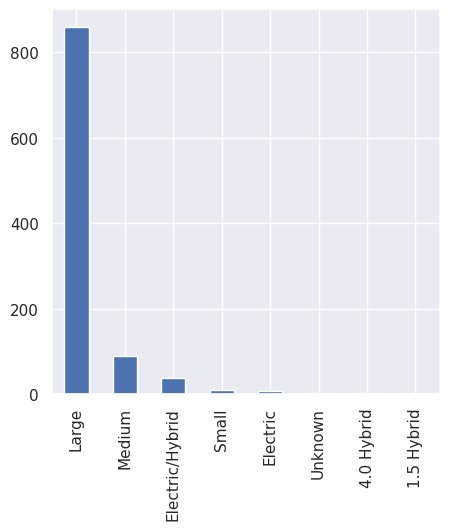

In [ ]:
data['Engine Size'].value_counts().plot(kind='bar')

In [ ]:
#Removing car model column because it is irrelevant and have a lot of unique values

In [ ]:
data.drop(columns='Car Model',inplace=True)
data.head()

,Car Make,Year,Engine Size,Horsepower,Torque,MPH,Price
0,Porsche,2022,Large,379,331,4.0,101200
1,Lamborghini,2021,Large,630,443,28.0,274390
2,Ferrari,2022,Large,661,561,3.0,333750
3,Audi,2022,Large,562,406,32.0,142700
4,McLaren,2021,Large,710,568,27.0,298000


In [ ]:
data['Car Make'].unique()

array(['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti', 'Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura', 'Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima'], dtype=object)

In [ ]:
#define a function to segment the values

def segment_car_make(value):
  if value in ['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti']:
    return 'Luxury'
  elif value in ['Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura']:
    return 'Mainstream'
  elif value in ['Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima']:
    return 'Speciality'
  else:
    return 'Other'
data['Car Make']=data['Car Make'].apply(segment_car_make)

<Axes: >

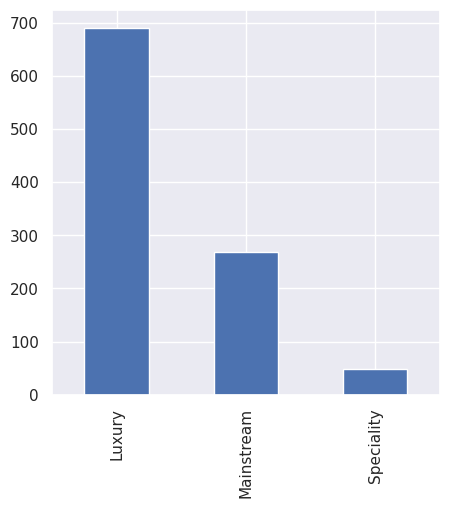

In [ ]:
data["Car Make"].value_counts().plot(kind='bar')

In [ ]:
data.head()

,Car Make,Year,Engine Size,Horsepower,Torque,MPH,Price
0,Luxury,2022,Large,379,331,4.0,101200
1,Luxury,2021,Large,630,443,28.0,274390
2,Luxury,2022,Large,661,561,3.0,333750
3,Luxury,2022,Large,562,406,32.0,142700
4,Luxury,2021,Large,710,568,27.0,298000


In [ ]:
#EXPLORATORY DATA ANALYSIS

In [ ]:
data.dtypes

Car Make        object
Year             int64
Engine Size     object
Horsepower       int64
Torque           int64
MPH            float64
Price            int64
dtype: object

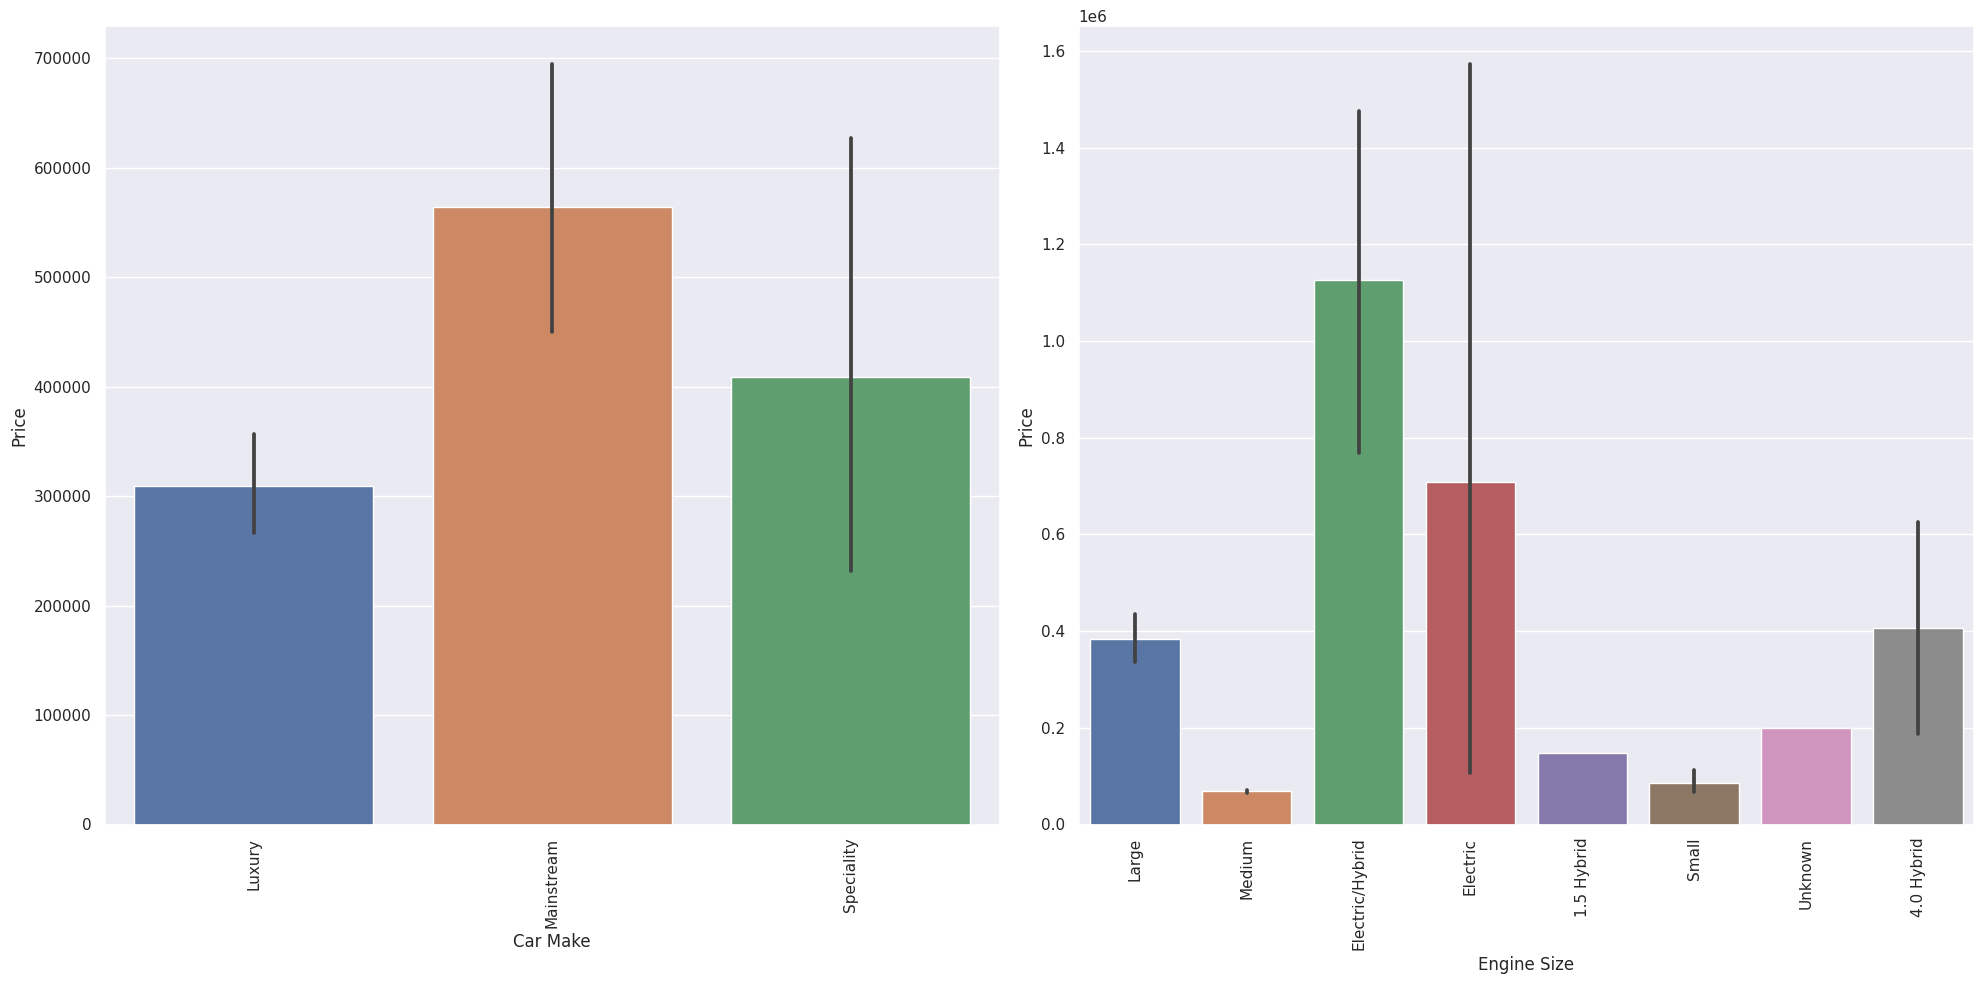

In [ ]:
#list of categorical variables
#creating bar plot of categorical features against price8
cat_vars=['Car Make','Engine Size']

#create figure with subplots
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axs=axs.flatten()

#create bar plot for each categorical variable
for i,var in enumerate(cat_vars):
  sns.barplot(x=var,y="Price",data=data,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()

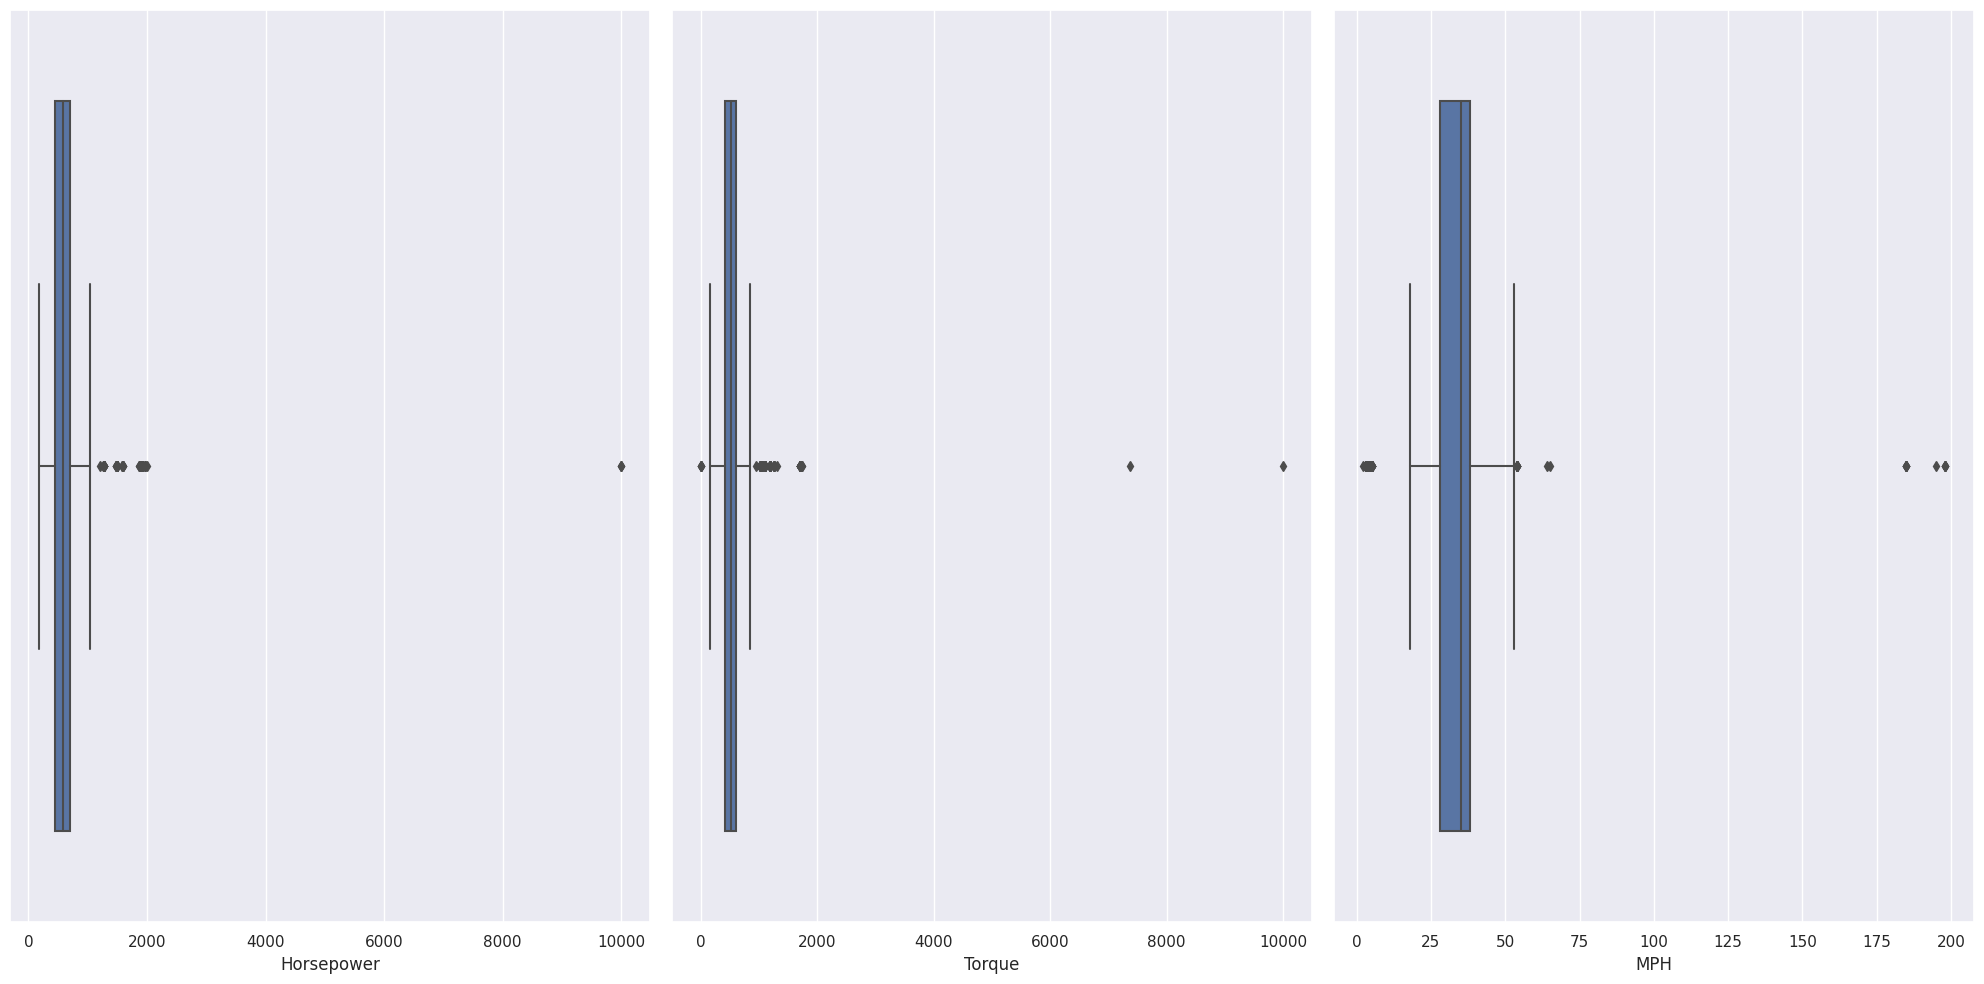

In [ ]:
#listing numerical variables
num_vars=['Horsepower','Torque','MPH']

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()

#constructing box plot
for i,var in enumerate(num_vars):
  sns.boxplot(x=var,data=data,ax=axs[i])

fig.tight_layout()

In [ ]:
#The above boxplots show the presence of outliers for the three numerical variables

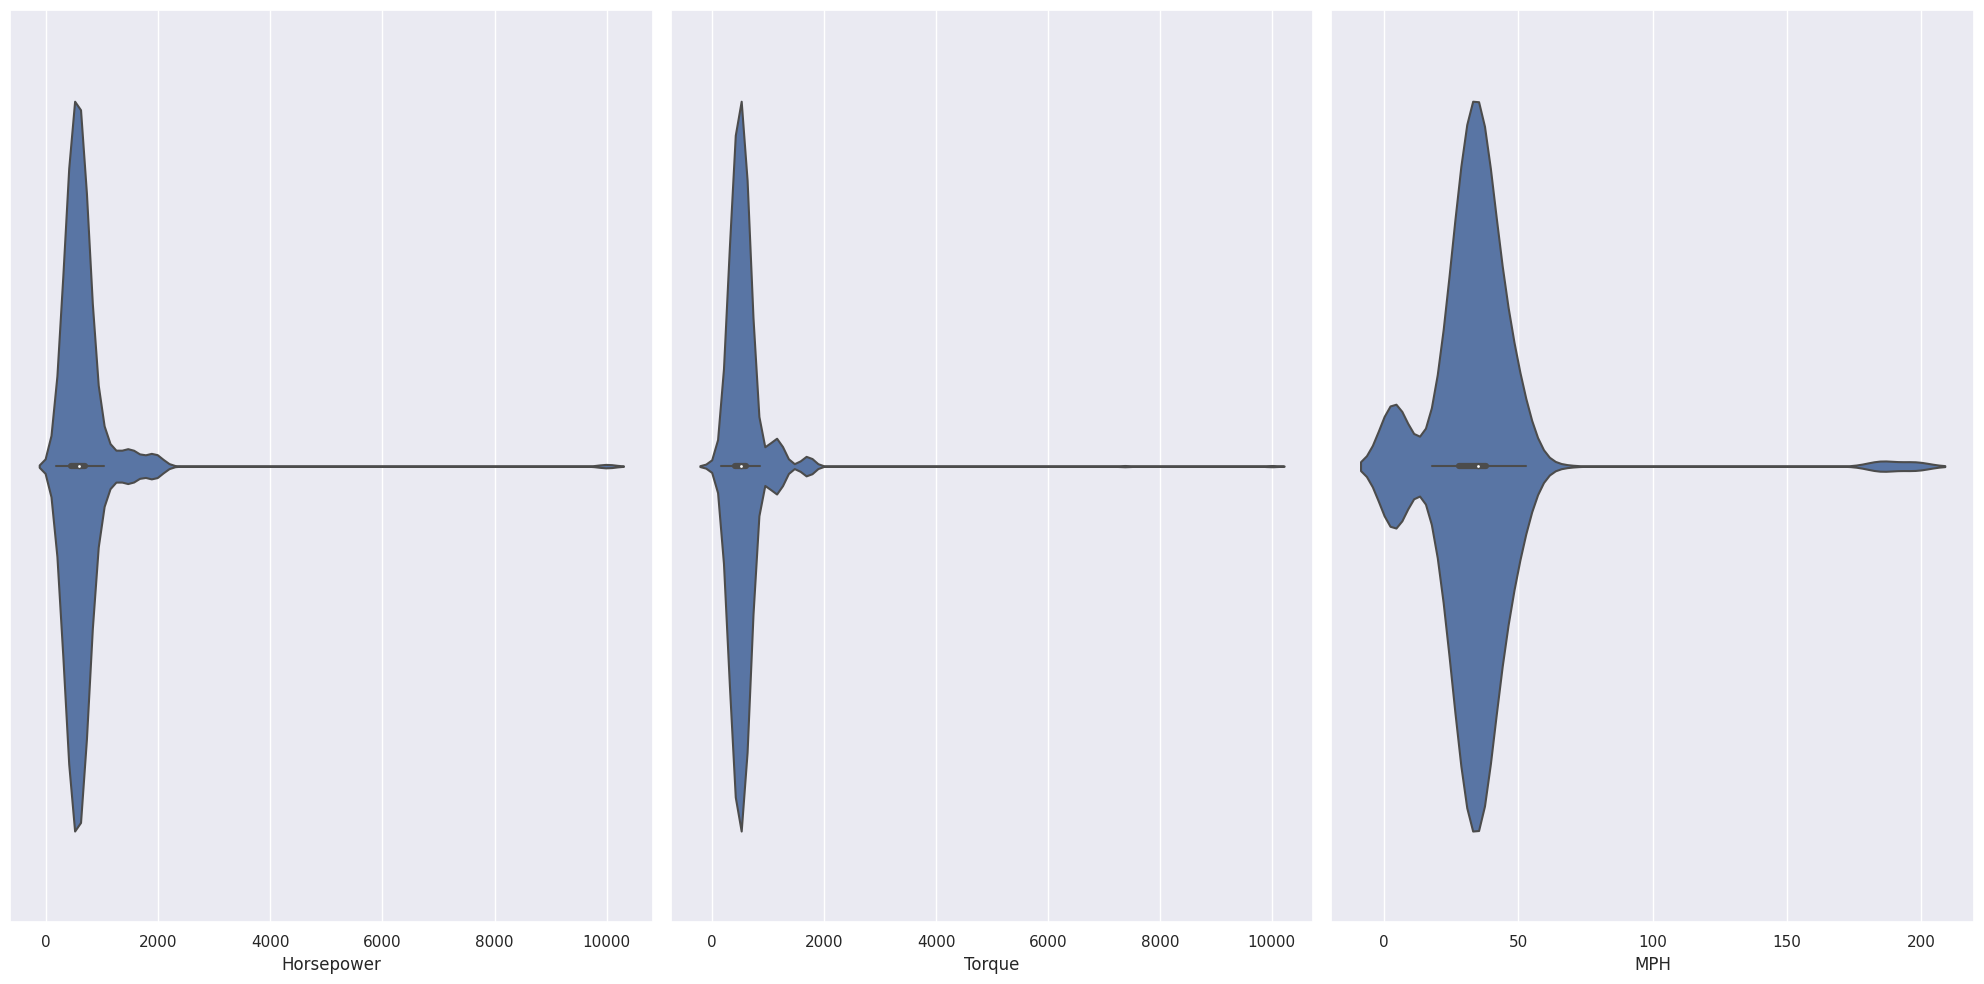

In [ ]:
#creating violin plots
num_vars=['Horsepower','Torque','MPH']
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i,var in enumerate(num_vars):
  sns.violinplot(x=var,data=data,ax=axs[i])
fig.tight_layout()

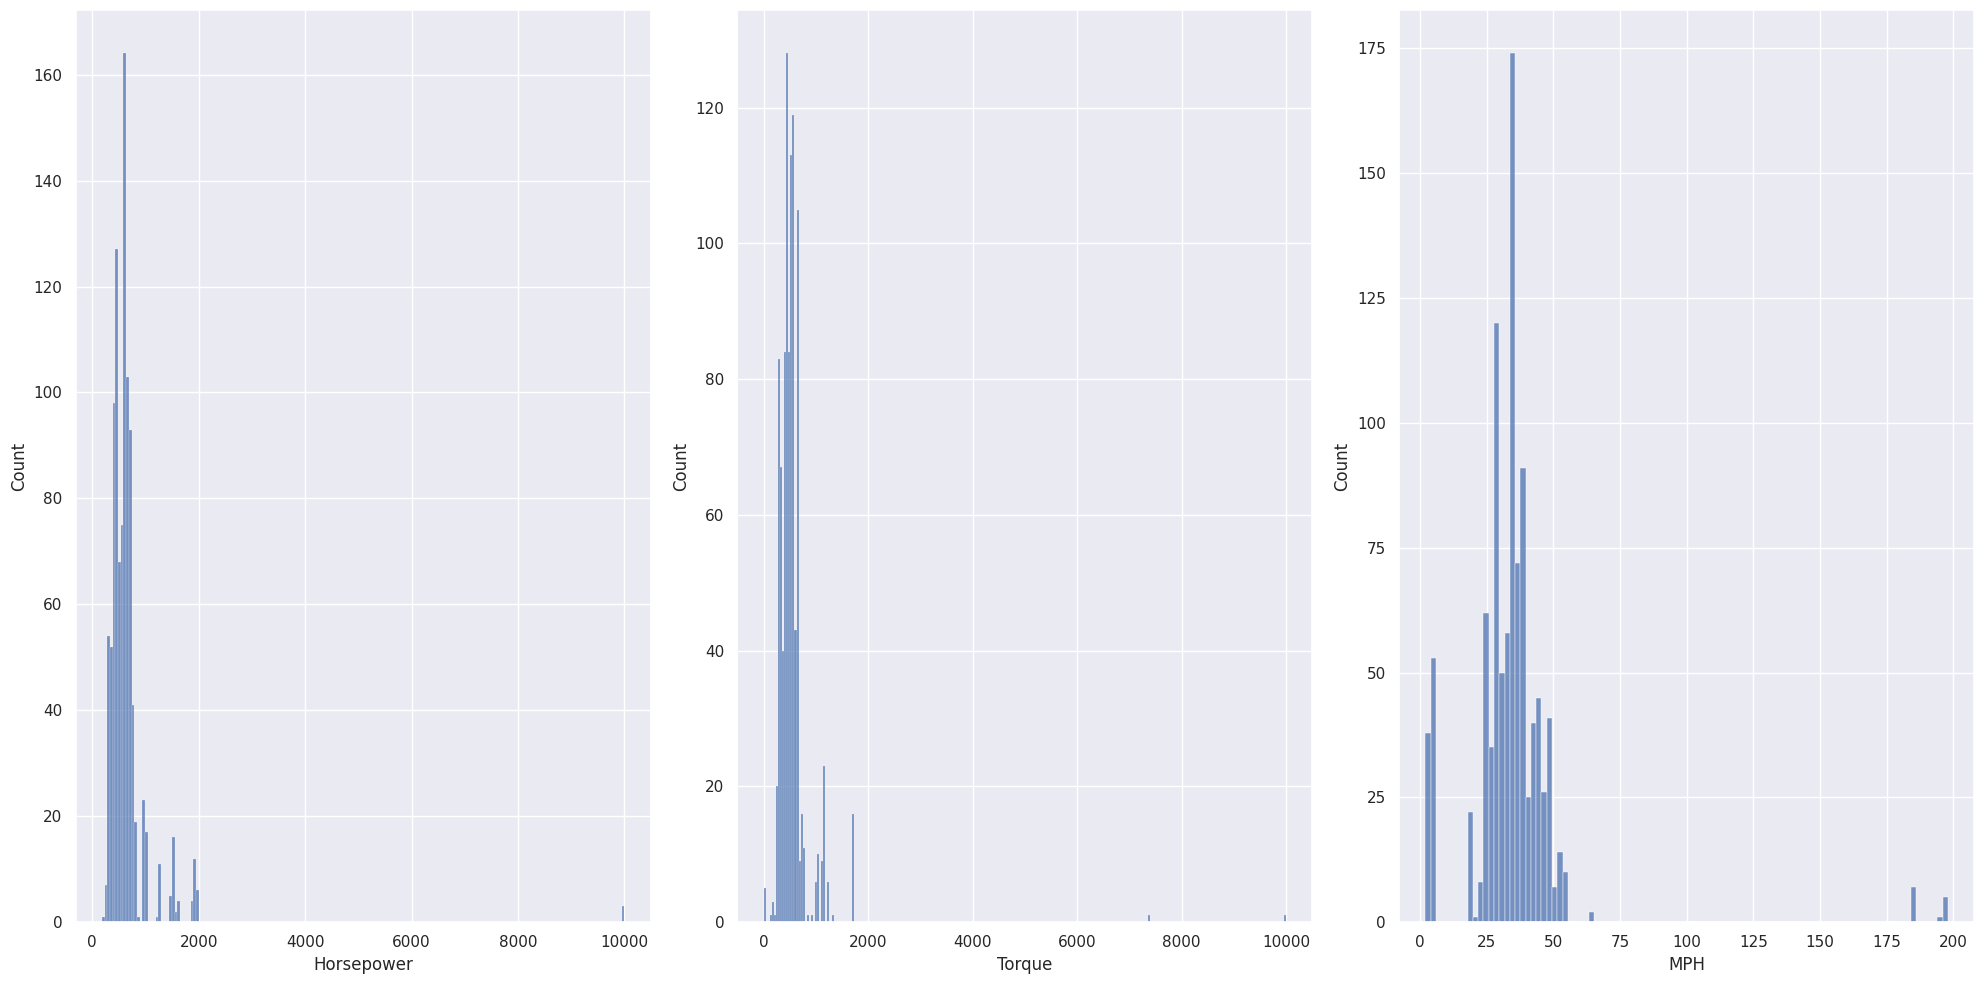

In [ ]:
#Creating histogram for numerical variables
num_vars=["Horsepower",'Torque','MPH']
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i,var in enumerate(num_vars):
  sns.histplot(x=var,data=data,ax=axs[i])
fig.tight_layout()

<Axes: xlabel='Horsepower'>

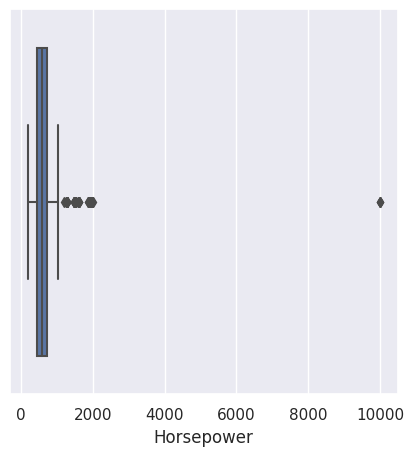

In [ ]:
sns.boxplot(x='Horsepower',data=data)

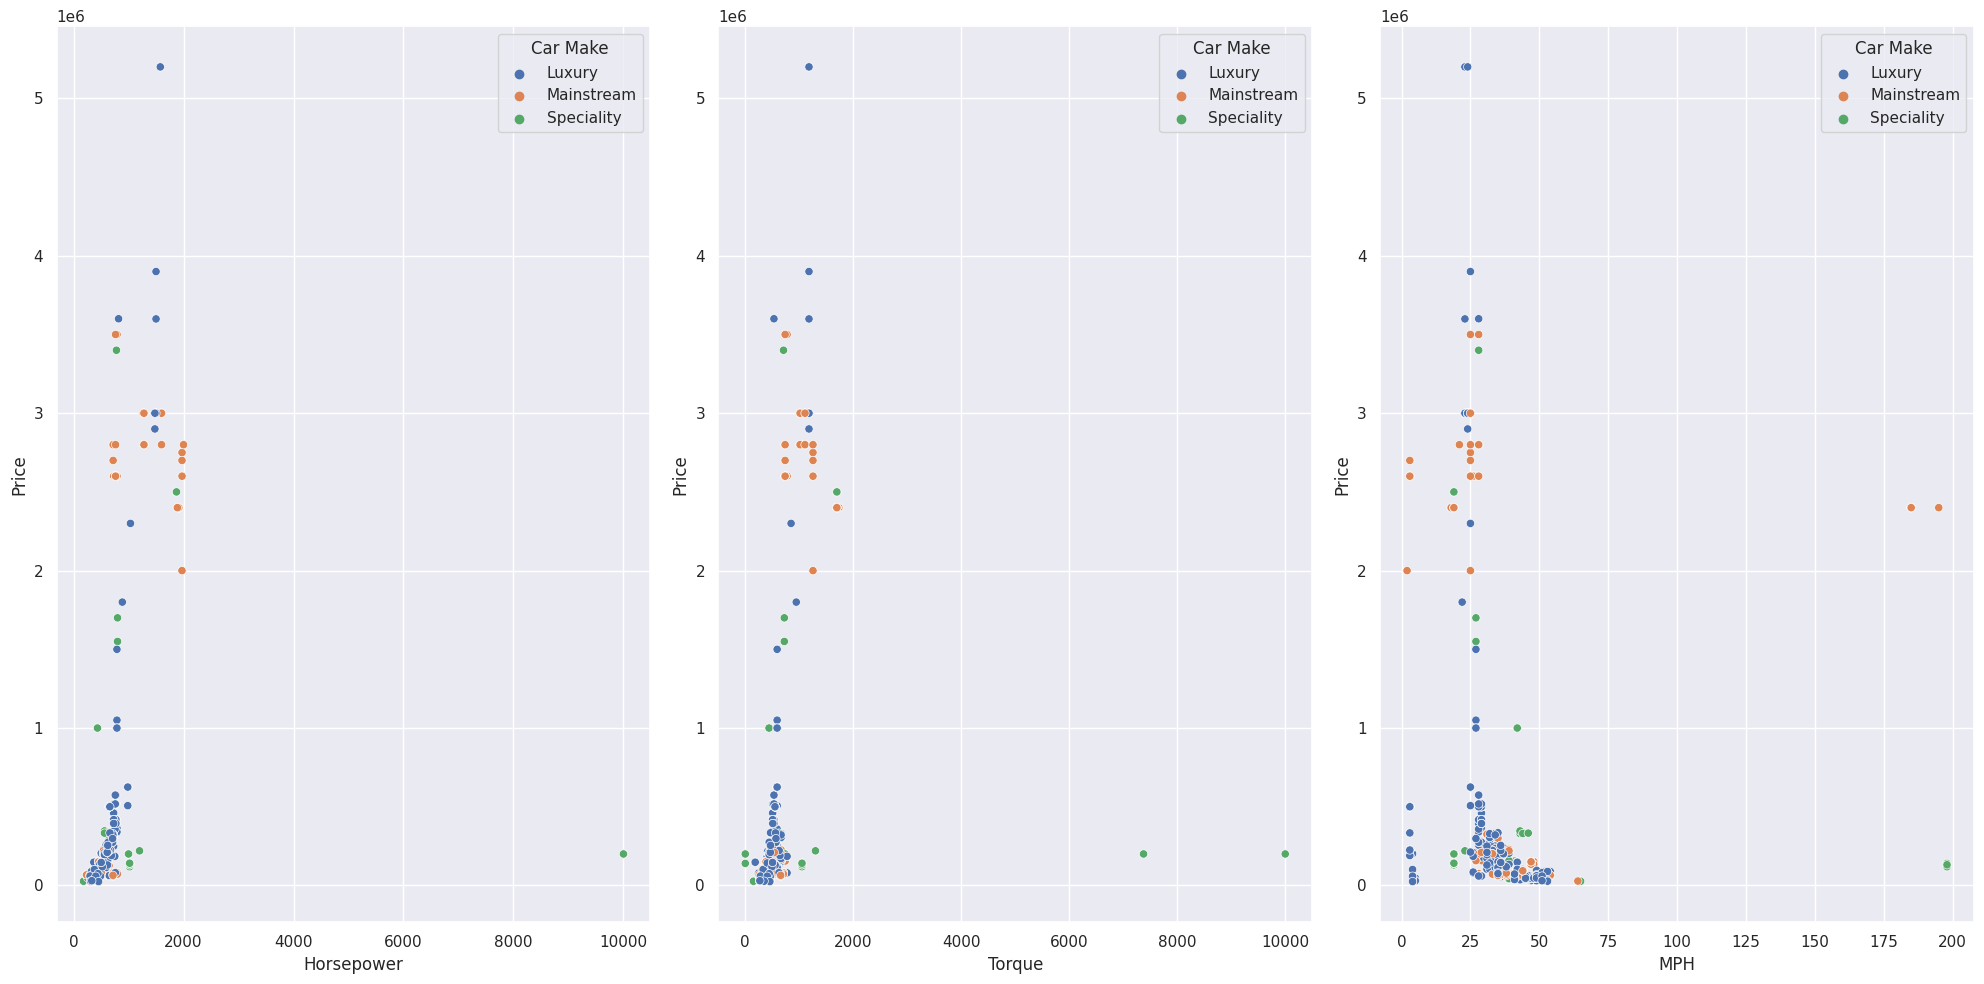

In [ ]:
#Creating scatter plot for numerical variables against Price
num_vars=['Horsepower','Torque','MPH']
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i,var in enumerate(num_vars):
  sns.scatterplot(x=var,y='Price',hue='Car Make',data=data,ax=axs[i])
fig.tight_layout()

<ipython-input-53-3aae59ce06c6>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year",y="Price",hue='Car Make',data=data,ci=None)


Text(0, 0.5, 'Price')

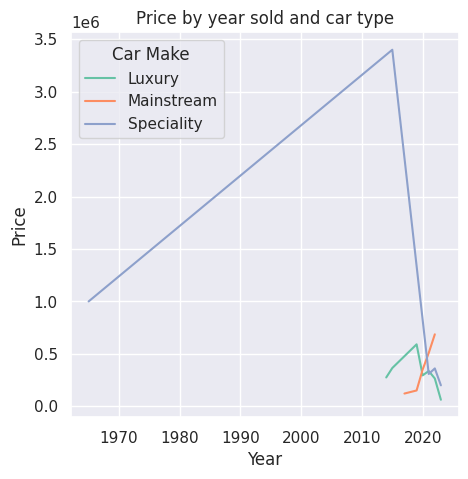

In [ ]:
#Creating a line plot of price against year
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.lineplot(x="Year",y="Price",hue='Car Make',data=data,ci=None)
plt.title("Price by year sold and car type")
plt.xlabel("Year")
plt.ylabel("Price")

In [ ]:
#DATA PRE-PROCESSING PART 2
data.head()

,Car Make,Year,Engine Size,Horsepower,Torque,MPH,Price
0,Luxury,2022,Large,379,331,4.0,101200
1,Luxury,2021,Large,630,443,28.0,274390
2,Luxury,2022,Large,661,561,3.0,333750
3,Luxury,2022,Large,562,406,32.0,142700
4,Luxury,2021,Large,710,568,27.0,298000


In [ ]:
#Checking missing values
check_missing=data.isnull().sum()
check_missing

Car Make       0
Year           0
Engine Size    0
Horsepower     0
Torque         0
MPH            0
Price          0
dtype: int64

In [ ]:
check_missing=data.isnull().sum()*100/data.shape[0]
check_missing

Car Make       0.0
Year           0.0
Engine Size    0.0
Horsepower     0.0
Torque         0.0
MPH            0.0
Price          0.0
dtype: float64

In [ ]:
data.shape[0]

1007

In [ ]:
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
data.fillna(0).head()

,Car Make,Year,Engine Size,Horsepower,Torque,MPH,Price
0,Luxury,2022,Large,379,331,4.0,101200
1,Luxury,2021,Large,630,443,28.0,274390
2,Luxury,2022,Large,661,561,3.0,333750
3,Luxury,2022,Large,562,406,32.0,142700
4,Luxury,2021,Large,710,568,27.0,298000


In [ ]:
data.dtypes

Car Make        object
Year             int64
Engine Size     object
Horsepower       int64
Torque           int64
MPH            float64
Price            int64
dtype: object

In [ ]:
#Label Encoding for Object Datatype

#Loop over each column in the DataFrame where dtype='object'
for col in data.select_dtypes(include=['object']).columns:
  #Print the column name and unique values
  print(f'{col}:{data[col].unique()}')

Car Make:['Luxury' 'Mainstream' 'Speciality']
Engine Size:['Large' 'Medium' 'Electric/Hybrid' 'Electric' '1.5 Hybrid' 'Small'
 'Unknown' '4.0 Hybrid']


In [ ]:
#LABEL ENCODING

from sklearn import preprocessing
#Loop over each column in the dataframe where dtype is object
for col in data.select_dtypes(include=['object']).columns:
  #Initialise a LabelEncoder object
  label_encoder=preprocessing.LabelEncoder()
  #Fit the encoder to the unique values in the column
  label_encoder.fit(data[col].unique())
  #Transfer the column using the encoder
  data[col]=label_encoder.transform(data[col])
  #Print the column name and the unique encoded values
  print(f'{col}:{data[col].unique()}')

Car Make:[0 1 2]
Engine Size:[4 5 3 2 0 6 7 1]


In [ ]:
#TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#REMOVE OUTLIER FROM TRAIN DATA USING IQR

#calculate IQR for each feature
q1=np.percentile(x_train,25,axis=0)
q3=np.percentile(x_train,75,axis=0)
iqr=q3-q1
#identify outliers using the IQR method
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=np.logical_or(x_train<lower_bound,x_train>upper_bound)

#np.logical_or is a logical function used to check truth value between two arrays that are of the same shape

#remove outliers from the training set
x_train=x_train[~np.any(outliers,axis=1)]
y_train=y_train[~np.any(outliers,axis=1)]

In [ ]:
x_train.shape

(562, 6)

In [ ]:
y_train.shape

(562,)

In [ ]:
y_train.head()

767     84595
764    235000
529    325000
252    256500
451    220000
Name: Price, dtype: int64

<Axes: >

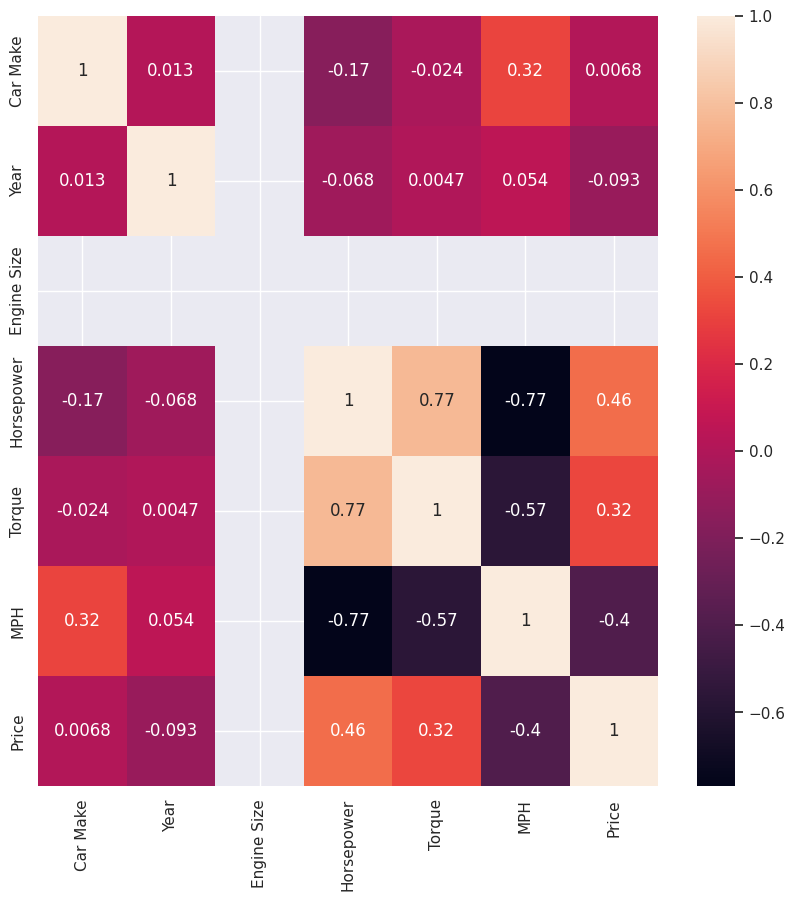

In [ ]:
#CORRERELATION HEAT MAP

#concatenate x_train and y_train
train_data=pd.concat([x_train,y_train],axis=1)

# 0 for rows, 1 for columns

#correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),fmt='.2g',annot=True)

In [ ]:
#From the above heatmap we have 0 correlation therefore we remove it

x_train.drop(columns='Engine Size',inplace=True)
x_train.head()

,Car Make,Year,Horsepower,Torque,MPH
767,0,2022,444,406,38.0
764,0,2021,612,561,34.0
529,0,2021,720,590,31.0
252,0,2021,592,457,28.0
451,1,2021,626,664,33.0


In [ ]:
x_test.drop(columns='Engine Size',inplace=True)
x_test.head()

,Car Make,Year,Horsepower,Torque,MPH
799,0,2021,503,505,35.0
311,0,2021,650,650,35.0
85,0,2022,1500,1180,24.0
435,1,2021,1262,1106,25.0
204,0,2022,325,332,53.0


In [ ]:
x_train.shape

(562, 5)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeRegressor()

#define the hyper parameters to tune their values
param_grid={'max_depth':[2,4,6,8],'min_samples_split':[2,4,6,8],'min_samples_leaf':[1,2,3,4],'max_features':["auto",'sqrt','log2'],'random_state':[0,42]}

#Create a GridSearchCV object
grid_search=GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')

#scoring:strategy to evaluate performance of cross validated data

grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 0}


In [ ]:
dtree=DecisionTreeRegressor(max_depth=8,max_features='auto',min_samples_leaf=1,min_samples_split=6,random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=6,
                      random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=dtree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE is {}".format(rmse))

MAE is 252528.2798654277
MAPE is 0.9123639416422356
MSE is 654775146500.5344
R2 score is -0.10461388697764851
RMSE is 809181.7759320426


Text(0, 0.5, 'Feature Name')

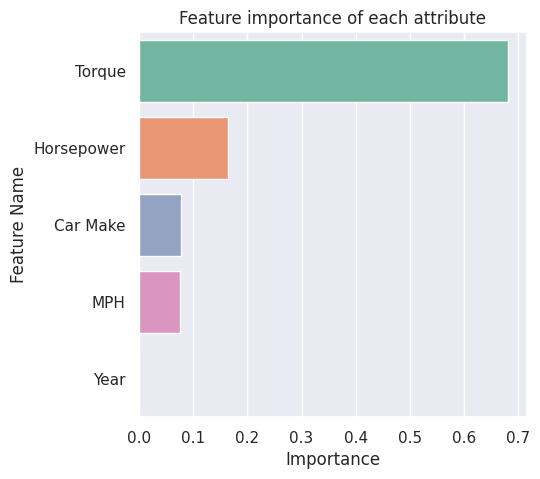

In [ ]:
imp_df=pd.DataFrame({"Feature Name":x_train.columns,'Importance':dtree.feature_importances_})
fi=imp_df.sort_values(by='Importance',ascending=False)
fi2=fi.head(10)
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title("Feature importance of each attribute")
plt.xlabel("Importance")
plt.ylabel("Feature Name")

In [ ]:
#RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
param_grid={'max_depth':[3,5,7,9],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_features':['auto','sqrt'],'random_state':[0,42]}
grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)
print("Best Parameters",grid_search.best_params_)

Best Parameters {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
rf=RandomForestRegressor(max_depth=9,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=rf.predict(x_test)

In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

In [ ]:
print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE is {}".format(rmse))

MAE is 191001.86401733727
MAPE is 0.6928016566832123
MSE is 282103291298.52
R2 score is 0.524088208301914
RMSE is 531133.9673740703


Text(0, 0.5, 'Feature Name')

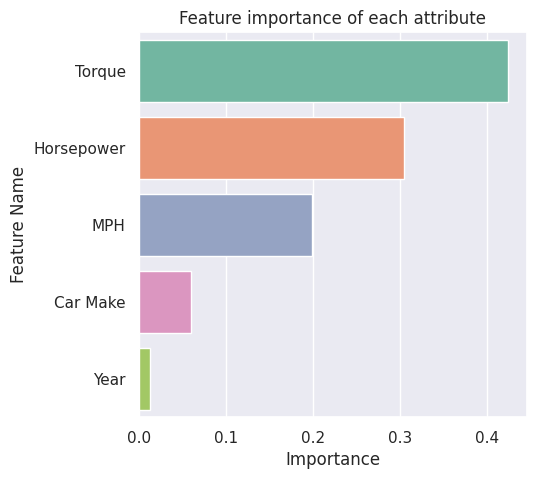

In [ ]:
imp_df=pd.DataFrame({"Feature Name":x_train.columns,"Importance":rf.feature_importances_})
fi=imp_df.sort_values(by='Importance',ascending=False)
sns.barplot(data=fi,x="Importance",y="Feature Name")
plt.title("Feature importance of each attribute")
plt.xlabel("Importance")
plt.ylabel("Feature Name")

In [ ]:
#ADA BOOST REGRESSOR

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
abr=AdaBoostRegressor()
params={'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,1,10],'random_state':[0,42]}
grid_search=GridSearchCV(abr,param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)
print("Best hyperparameters",grid_search.best_params_)

Best hyperparameters {'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 42}


In [ ]:
abr=AdaBoostRegressor(learning_rate=0.01,n_estimators=100,random_state=42)
abr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=100, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=abr.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)
print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE is {}".format(rmse))

MAE is 241590.79582300736
MAPE is 1.1332858322753336
MSE is 490424241476.83746
R2 score is 0.17264815174936976
RMSE is 700302.9640640096


Text(0, 0.5, 'Feature Name')

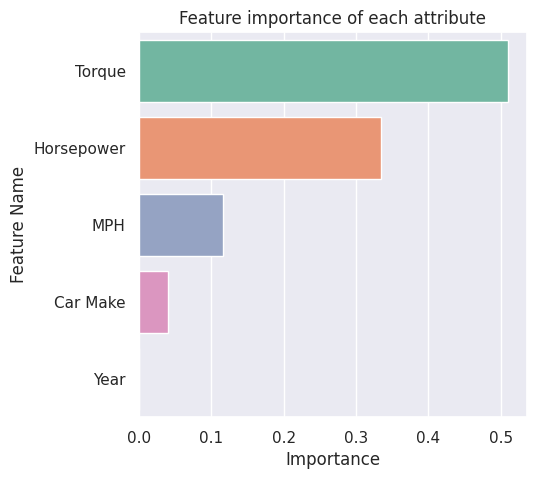

In [ ]:
imp_df=pd.DataFrame({"Feature Name":x_train.columns,"Importance":abr.feature_importances_})
fi=imp_df.sort_values(by='Importance',ascending=False)
sns.barplot(data=fi,x="Importance",y="Feature Name")
plt.title("Feature importance of each attribute")
plt.xlabel("Importance")
plt.ylabel("Feature Name")